In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data = pd.read_csv("H:\\User\\Desktop\\rqiue2.0\\Fiap\\IA & Chatbot\\Machine_Learning_HB\\cp6\\heart_attack_prediction_dataset.csv", sep = ",")

In [ ]:
data.info()


In [92]:
pd.set_option('display.max_columns', None)


In [94]:
data.sample(5)

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
603     IEV1815   58    Male          184         163/94          49   
3822    VZD4232   88    Male          179         113/88          86   
1706    WIC0566   67    Male          290          94/80          42   
3219    KWR4657   72  Female          263         174/76          43   
5536    AAN5057   20  Female          140         119/85         103   

      Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  \
603          0               0        1        0                    1   
3822         1               0        1        1                    1   
1706         0               0        1        0                    1   
3219         1               0        1        1                    0   
5536         0               0        0        1                    0   

      Exercise Hours Per Week       Diet  Previous Heart Problems  \
603                  8.963418    Healthy                        1   
3822                19.379163    Average                        0   
1706                17.717350    Healthy                        1   
3219                16.549091    Average                        1   
5536                 7.304885  Unhealthy                        0   

      Medication Use  Stress Level  Sedentary Hours Per Day  Income  \
603                1             3                 1.579202  208956   
3822               1             4                 4.348190   24659   
1706               1            10                10.347464  284219   
3219               1             6                 6.153058  110596   
5536               0             7                 7.342875  281186   

            BMI  Triglycerides  Physical Activity Days Per Week  \
603   31.984014             98                                5   
3822  28.001584            286                                3   
1706  26.298080            597                                3   
3219  23.731381            741                                1   
5536  30.484374            323                                4   

      Sleep Hours Per Day    Country      Continent           Hemisphere  \
603                     4     France         Europe  Northern Hemisphere   
3822                    9  Argentina  South America  Southern Hemisphere   
1706                    4      Spain         Europe  Southern Hemisphere   
3219                    5   Colombia  South America  Northern Hemisphere   
5536                    9    Germany         Europe  Northern Hemisphere   

      Heart Attack Risk  
603                   0  
3822                  0  
1706                  0  
3219                  0  
5536                  0

In [ ]:
data.isnull().sum()

In [101]:
data['Sex'].value_counts()

Sex
Male      6111
Female    2652
Name: count, dtype: int64

h:\Programacao\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


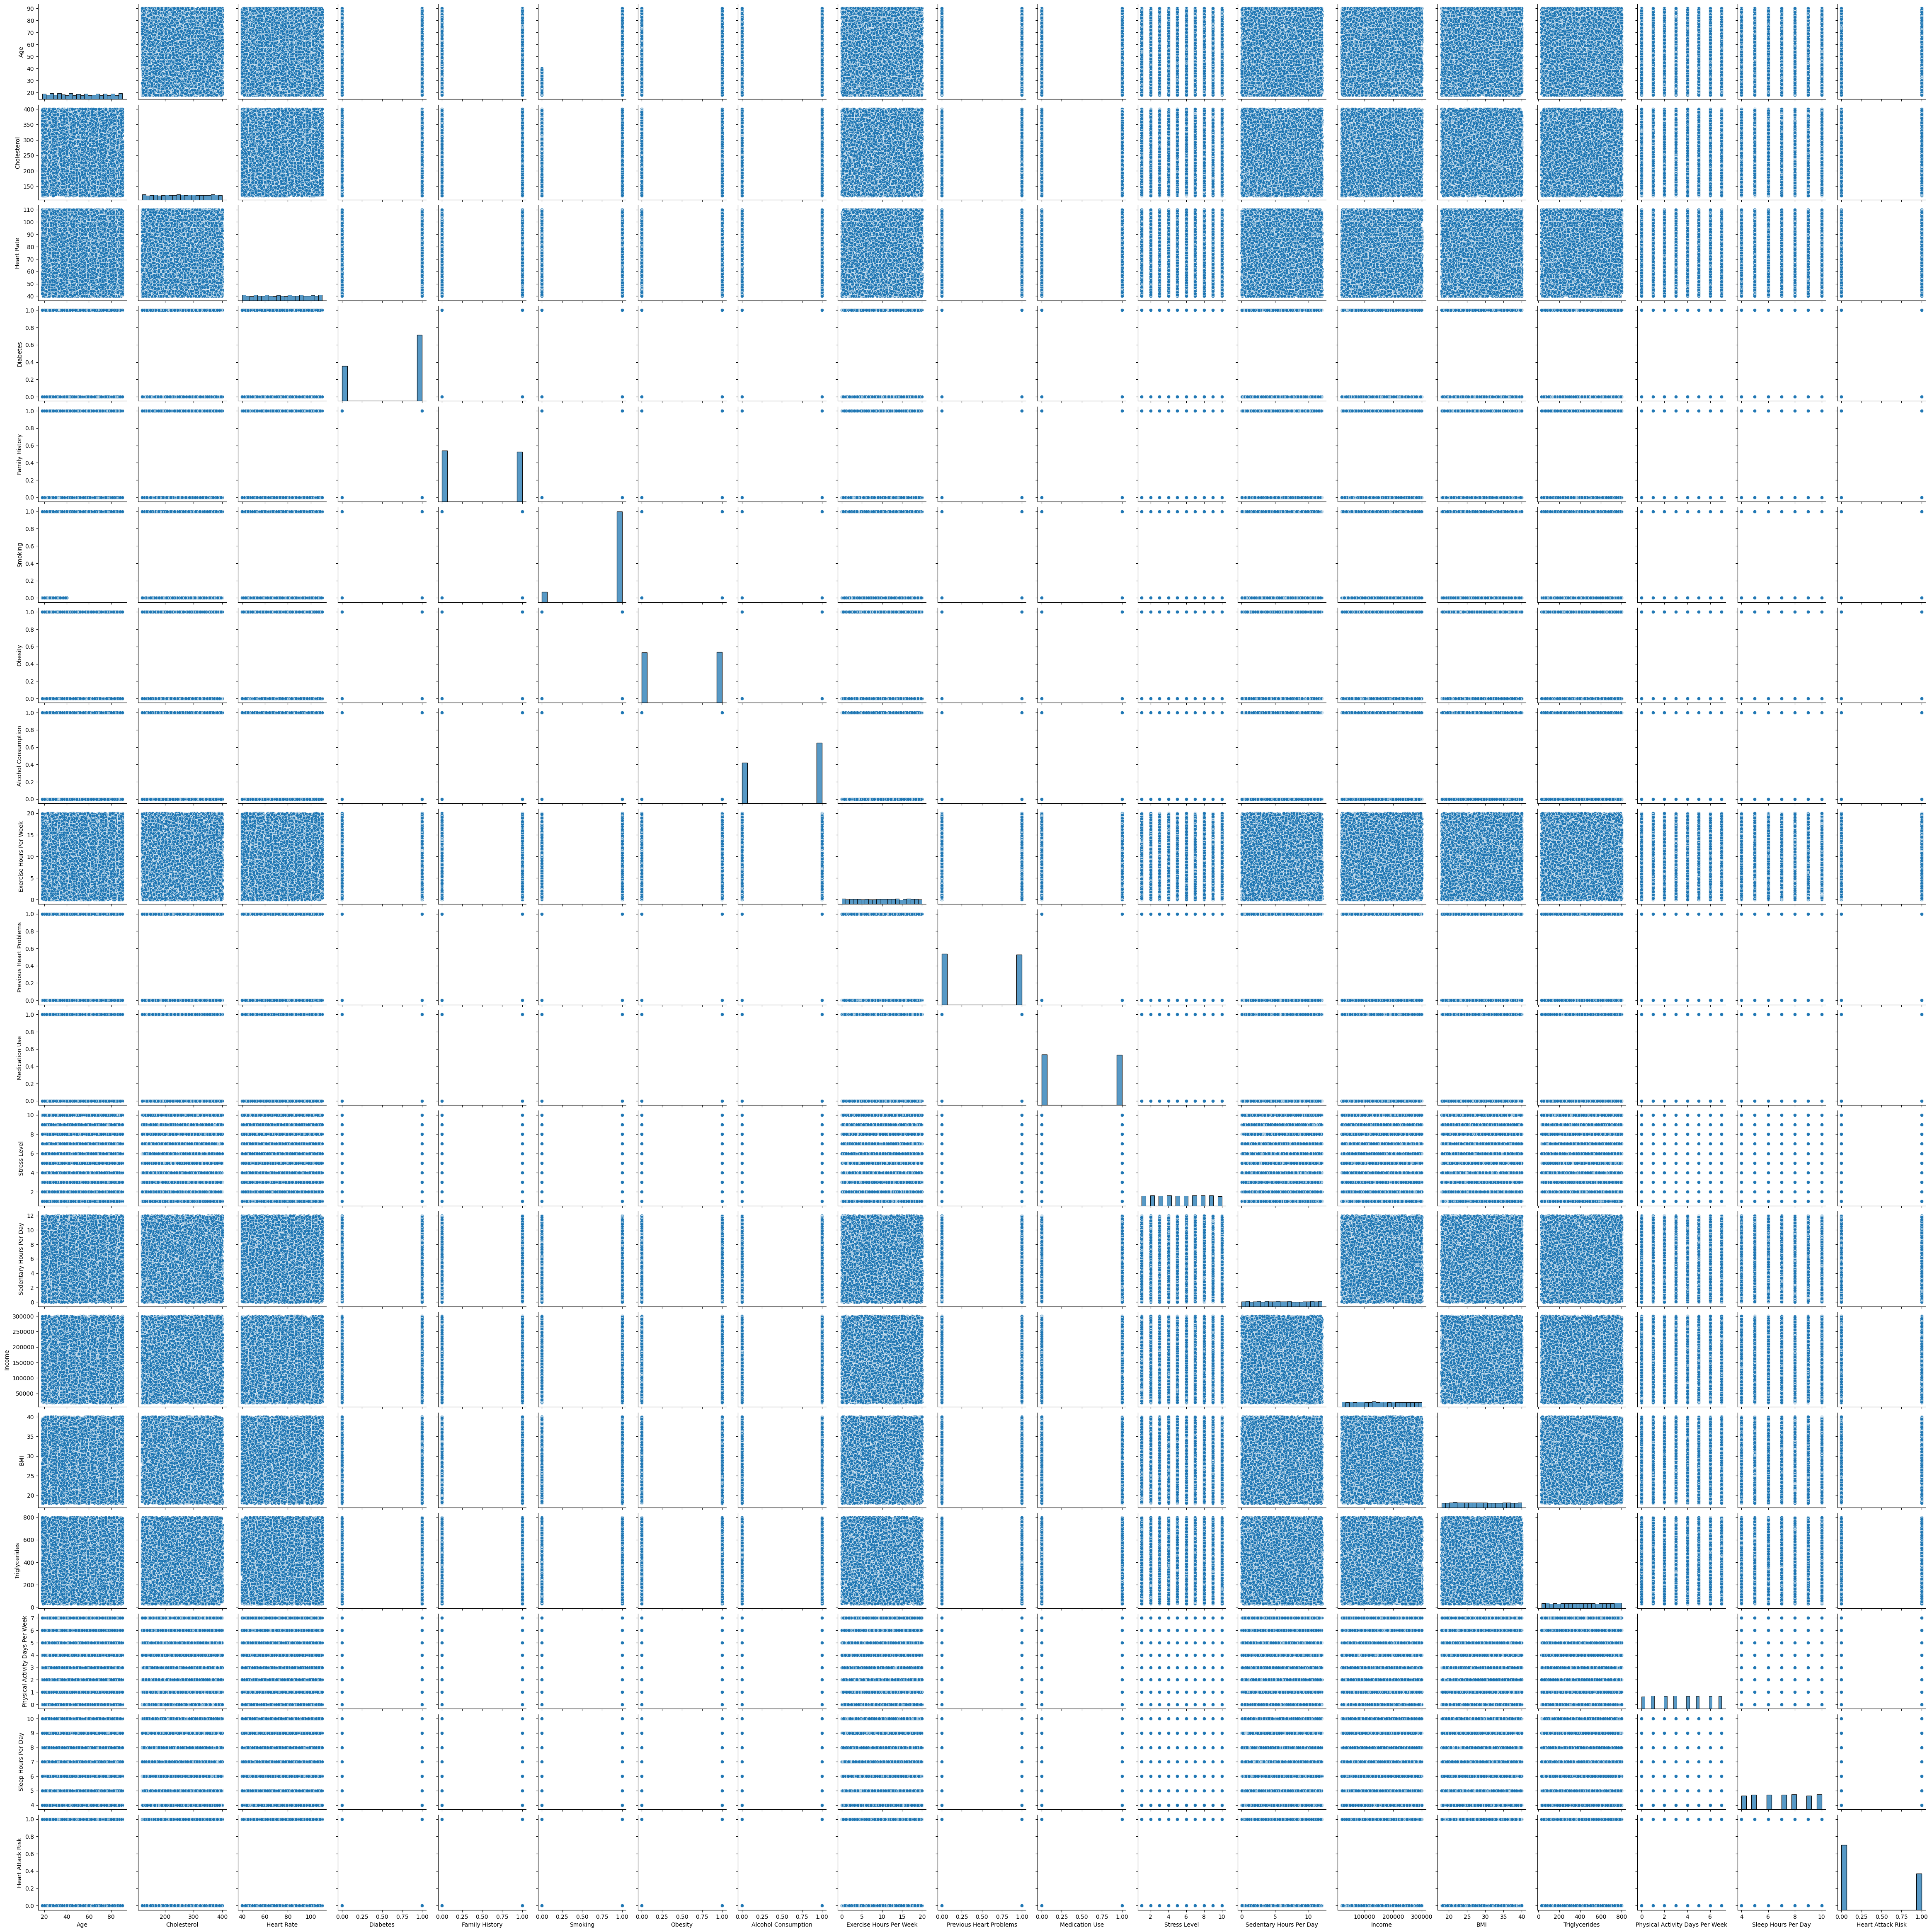

In [102]:
sns.pairplot(data)
plt.show()

In [52]:
# dados = pd.get_dummies(dados, columns=['Patient ID','Hemisphere'])


In [ ]:
# #Dividindo Pressao Sanguinea em Pressao Sistolica e Pressao Diastolica
# dados[['Systolic Pressure', 'Diastolic Pressure']] = dados['Blood Pressure'].str.split('/', expand=True)
# dados = dados.drop('Blood Pressure', axis=1)

In [ ]:
# x = dados.drop(columns=["Patient ID","Hemisphere"])

# x.head(10)

Grafico que ira analisar a Quantidade de pessoas com risco de ataque cardiaco por continente

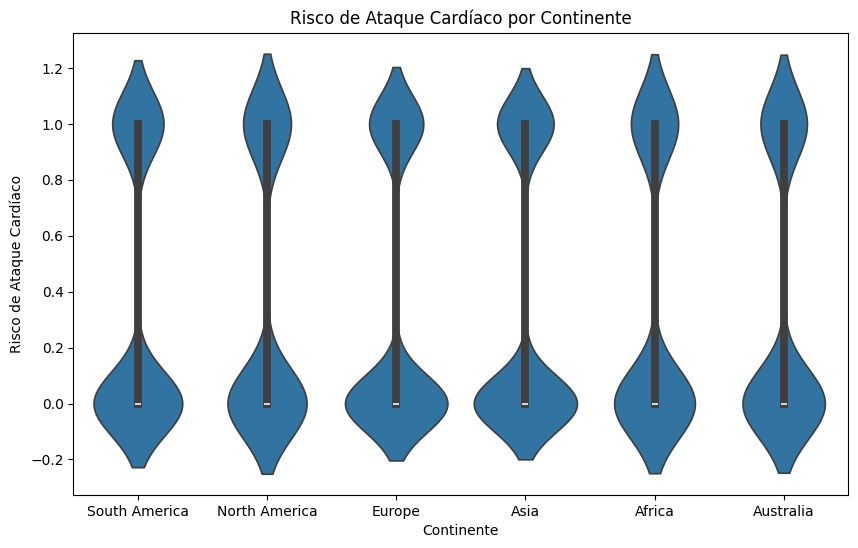

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Continent', y='Heart Attack Risk')
plt.xlabel('Continente')
plt.ylabel('Risco de Ataque Cardíaco')
plt.title('Risco de Ataque Cardíaco por Continente')

plt.show()

Grafico demonstrando a distribuicao de triglicérides por idade

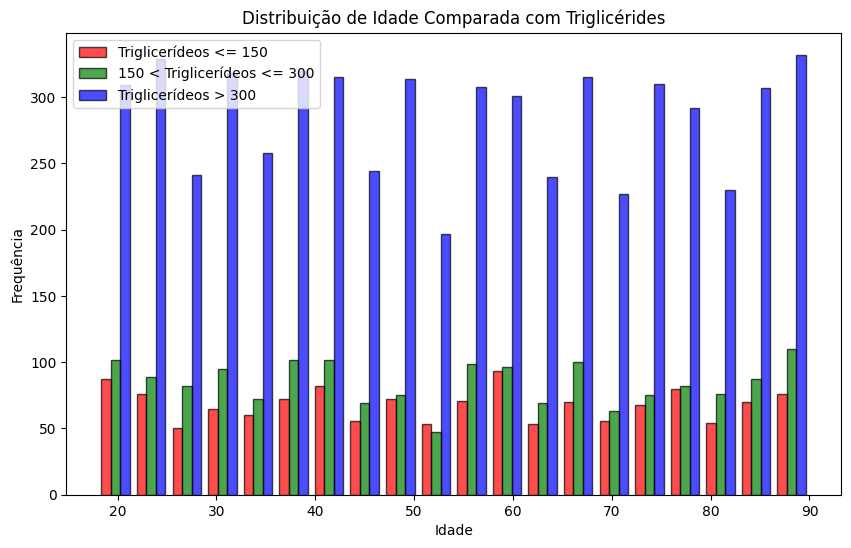

In [15]:
plt.figure(figsize=(10, 6))
plt.hist([data[data['Triglycerides'] <= 150]['Age'], data[(data['Triglycerides'] > 150) & (data['Triglycerides'] <= 300)]['Age'], data[data['Triglycerides'] > 300]['Age']],
         bins=20, edgecolor='k', label=['Triglicerídeos <= 150', '150 < Triglicerídeos <= 300', 'Triglicerídeos > 300'], alpha=0.7, color=['r', 'g', 'b'])

plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade Comparada com Triglicérides')
plt.legend()
plt.show()


Grafico analisa pessoas obesas por sexo, separando as que tem obesidade e nao tem

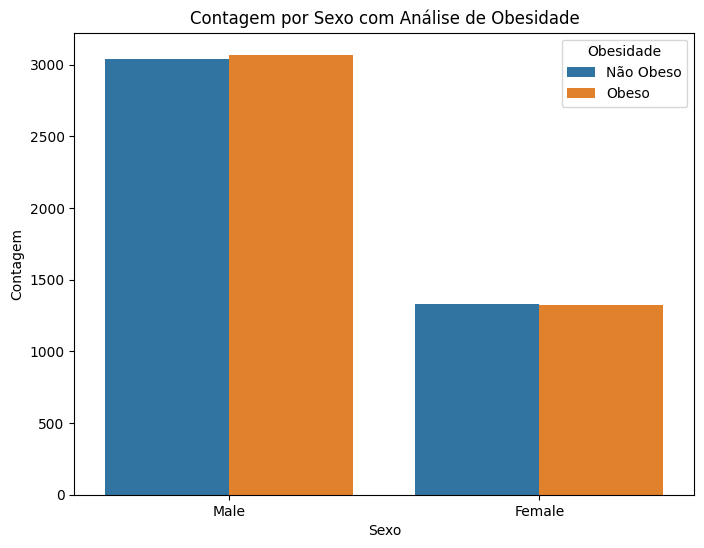

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Obesity')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Contagem por Sexo com Análise de Obesidade')
plt.legend(title='Obesidade', labels=['Não Obeso', 'Obeso'])

plt.show()

Mostra o total de paciente e a quantidade que tem diabete ou nao

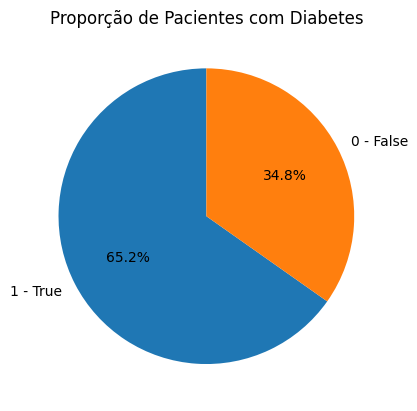

In [18]:
value_counts = data['Diabetes'].value_counts()

labels = ['1 - True', '0 - False']
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Proporção de Pacientes com Diabetes')
plt.show()


O grafico mostra os 10 paises com os maiores indices de fumantes por pais, sendo a barra completa o total de pessoa

<Figure size 1200x600 with 0 Axes>

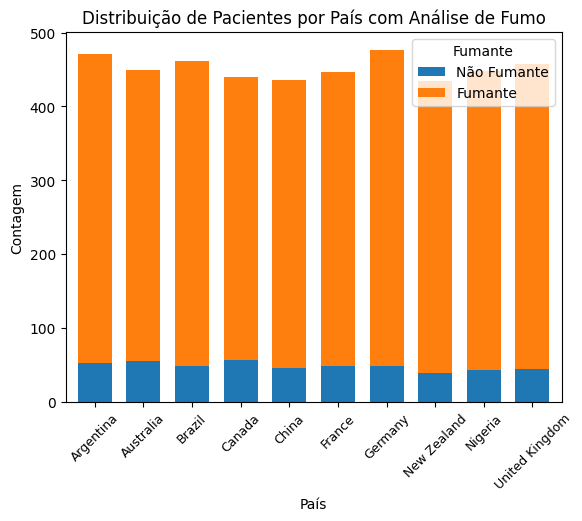

In [42]:
top_countries = data['Country'].value_counts().nlargest(10).index

filtered_data = data[data['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
smoking_by_country = filtered_data.groupby(['Country', 'Smoking'])['Age'].count().unstack().fillna(0)
ax = smoking_by_country.plot(kind='bar', stacked=True, width=0.7) 
plt.xlabel('País')
plt.ylabel('Contagem')
plt.title('Distribuição de Pacientes por País com Análise de Fumo')
plt.xticks(rotation=45)
plt.legend(title='Fumante', labels=['Não Fumante', 'Fumante'])

for label in ax.get_xaxis().get_ticklabels():
    label.set_fontsize(9)

plt.show()

# Metodo Supervisionado


# Metodo Nao Supervisionado

In [43]:
import scipy.cluster.hierarchy as sch   # Dendograma


# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Avaliacao de desemepnho
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [72]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# cols_to_normalize = ['Age', 'Cholesterol', 'Heart Rate', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
# dados[cols_to_normalize] = scaler.fit_transform(dados[cols_to_normalize])


In [63]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# dados['Sex'] = label_encoder.fit_transform(dados['Sex'])


In [69]:

# label_encoder = LabelEncoder()

# dados['Diet_encoded'] = label_encoder.fit_transform(dados['Diet'])


In [71]:
# dados = dados.drop(columns=['Diet'])


In [73]:
# # Modelos de agrupamento
# rs=42
# km = KMeans(n_clusters=4, random_state=rs)            
# gm = GaussianMixture(n_components=4, random_state=rs) 
# db = DBSCAN(eps=0.4)

In [84]:
from sklearn.cluster import KMeans
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(data[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(data[['Annual Income (k$)','Spending Score (1-100)']])

h:\Programacao\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# km_c = km.fit_predict(dados)
# gm_c = gm.fit_predict(dados)
# db_c = db.fit_predict(dados)

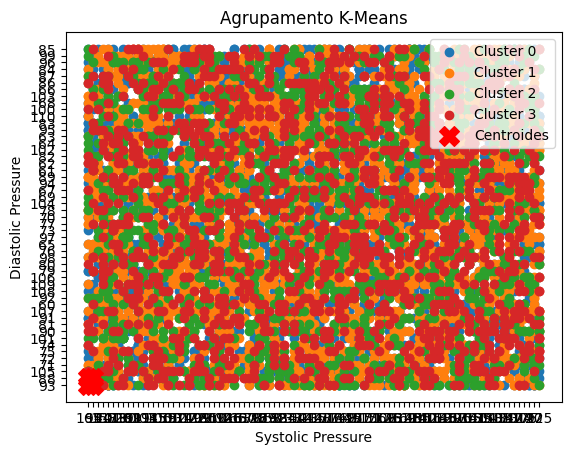

In [85]:
import matplotlib.pyplot as plt

# Vamos assumir que 'Systolic Pressure' e 'Diastolic Pressure' são as colunas escolhidas para o K-Means
dados['Cluster'] = kmeans_labels  # Adicione a coluna de clusters aos seus dados

# Obtenha os centroides dos clusters
centroides = km.cluster_centers_

# Crie uma matriz separada para cada cluster
clusters = []
for i in range(len(centroides)):
    cluster = dados[dados['Cluster'] == i]
    clusters.append(cluster)

# Crie um gráfico de dispersão para cada cluster
for i, cluster in enumerate(clusters):
    plt.scatter(cluster['Systolic Pressure'], cluster['Diastolic Pressure'], label=f'Cluster {i}')

# Plote os centroides dos clusters
plt.scatter(centroides[:, 0], centroides[:, 1], s=200, c='red', marker='X', label='Centroides')

plt.xlabel('Systolic Pressure')
plt.ylabel('Diastolic Pressure')
plt.legend()
plt.title('Agrupamento K-Means')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Suponha que você deseje visualizar os clusters em relação aos atributos 'Age' e 'Income'
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.scatter(dados['Age'], dados['Income'], c=km_c, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clusters')

plt.subplot(132)
plt.scatter(dados['Age'], dados['Income'], c=gm_c, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Gaussian Mixture Clusters')

plt.subplot(133)
plt.scatter(dados['Age'], dados['Income'], c=db_c, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('DBSCAN Clusters')

plt.tight_layout()
plt.show()
